In [99]:
import pandas as pd
import requests

In [100]:
# download and read the csv file
url = 'https://github.com/amkobee/ADS/raw/main/image_information.csv'
r = requests.get(url, allow_redirects=True)

open('image_information.csv', 'wb').write(r.content)

df = pd.read_csv('image_information.csv')
df.head()

,filename,class,photo_id,date_taken,views,longitude,latitude,owner,accuracy
0,photo_1.jpg,beach,39369934961,2013-12-29 15:53:55,20405,0,0,21893688@N03,0.0
1,photo_2.jpg,beach,29262432852,2016-05-06 18:06:06,5878,-117.325315,33.116130,8398907@N02,13.0
2,photo_3.jpg,beach,51201174994,2020-08-15 15:43:24,1344,-4.543889,48.243611,73422502@N08,16.0
3,photo_4.jpg,beach,51157992283,2020-08-15 15:42:56,1765,-4.543978,48.243666,73422502@N08,16.0
4,photo_5.jpg,beach,51158384536,2021-05-01 10:38:54,459,0,0,192406944@N02,0.0


In [101]:
# remove rows with longitude = 0 and longitude = 'latitude'
df = df[(df['longitude'] != '0')]
df = df[(df['longitude'] != 'latitude')]
df = df.reset_index(drop=True)

In [102]:
image_class = df.iloc[0]['class']
print(image_class)

beach


In [103]:
keywords = ['beach', 'river', 'mountains', 'desert', 'forest']

In [107]:
from gmplot import gmplot

# Initialize the map at a given point
gmap_all = gmplot.GoogleMapPlotter(0,0,3)
gmap_beach = gmplot.GoogleMapPlotter(0,0,3)
gmap_river = gmplot.GoogleMapPlotter(0,0,3)
gmap_mountains = gmplot.GoogleMapPlotter(0,0,3)
gmap_desert = gmplot.GoogleMapPlotter(0,0,3)
gmap_forest = gmplot.GoogleMapPlotter(0,0,3)

# loop through all coordinates
i = 0
while i < len(df):
    #print(i)
    image_class = df.iloc[i]['class']
    lon = float(df['longitude'][i])
    lat = float(df['latitude'][i])
    if image_class == keywords[0]:
        marker_color = 'blue'
        gmap_beach.marker(lat, lon, color=marker_color)
    elif image_class == keywords[1]:
        marker_color = 'yellow'
        gmap_river.marker(lat, lon, color=marker_color)
    elif image_class == keywords[2]:
        marker_color = 'white'
        gmap_mountains.marker(lat, lon, color=marker_color)
    elif image_class == keywords[3]:
        marker_color = 'red'
        gmap_desert.marker(lat, lon, color=marker_color)
    elif image_class == keywords[4]:
        marker_color = 'green'
        gmap_forest.marker(lat, lon, color=marker_color)
    gmap.marker(lat, lon, color=marker_color)
    i += 1

# Draw map into HTML file
gmap.draw("all_classes.html")
gmap_beach.draw(f"{keywords[0]}.html")
gmap_river.draw(f"{keywords[1]}.html")
gmap_mountains.draw(f"{keywords[2]}.html")
gmap_desert.draw(f"{keywords[3]}.html")
gmap_forest.draw(f"{keywords[4]}.html")

In [105]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# make a screenshot of the map and save the image
chromeOptions = Options()
chromeOptions.add_argument("--kiosk")

driver = webdriver.Chrome(options=chromeOptions)
driver.get("file:///Users/ammarbesic/Desktop/all_classes.html")
time.sleep(3)
driver.find_element_by_xpath("//button[@class='dismissButton']").click()
time.sleep(10)
driver.save_screenshot('all.png')

for word in keywords:
    driver.get(f"file:///Users/ammarbesic/Desktop/{word}.html")
    time.sleep(3)
    driver.find_element_by_xpath("//button[@class='dismissButton']").click()
    time.sleep(5)
    driver.save_screenshot(f'{word}.png')



driver.quit()

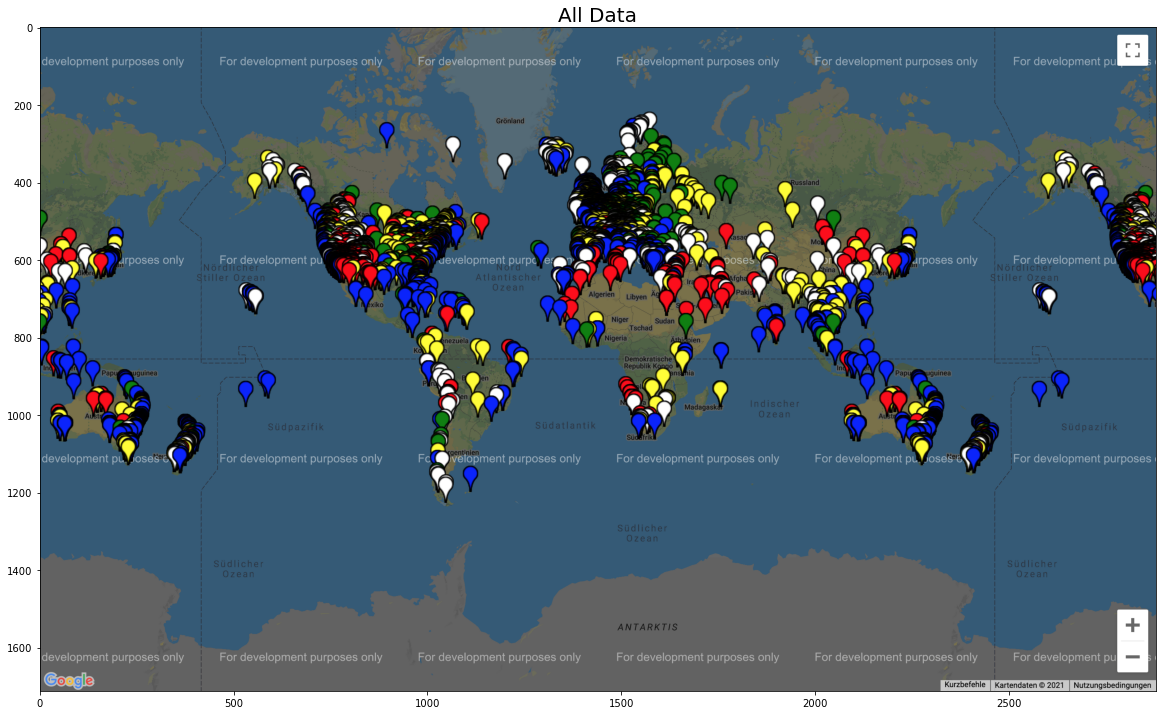

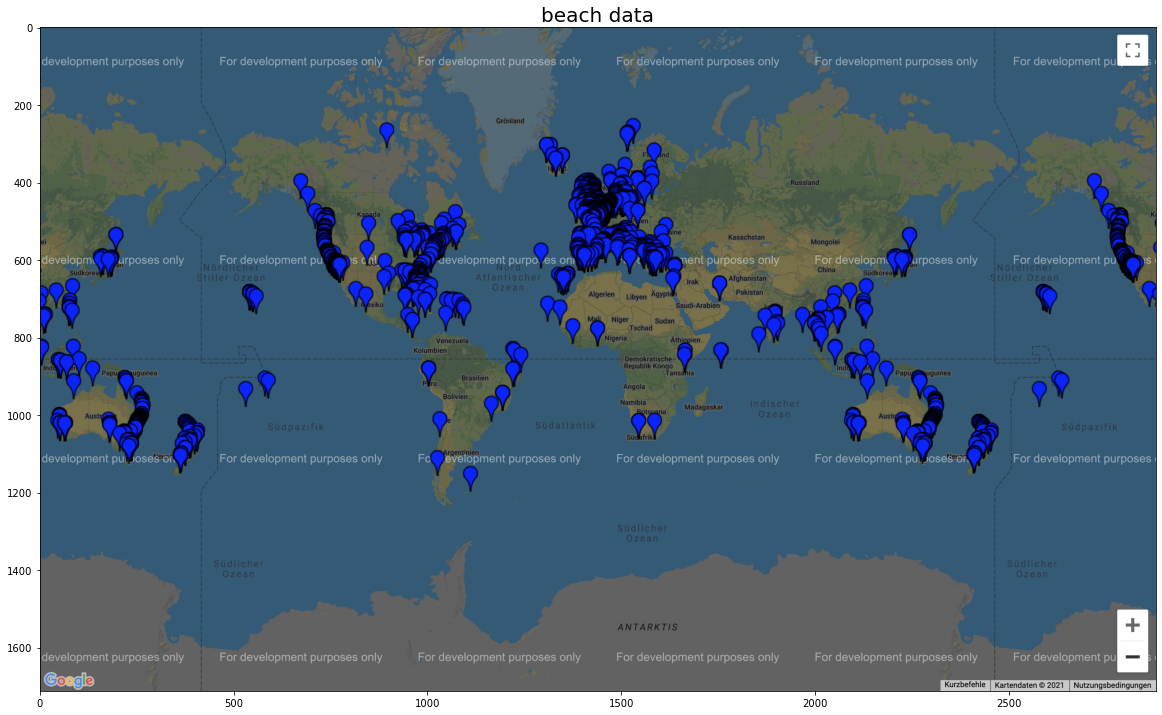

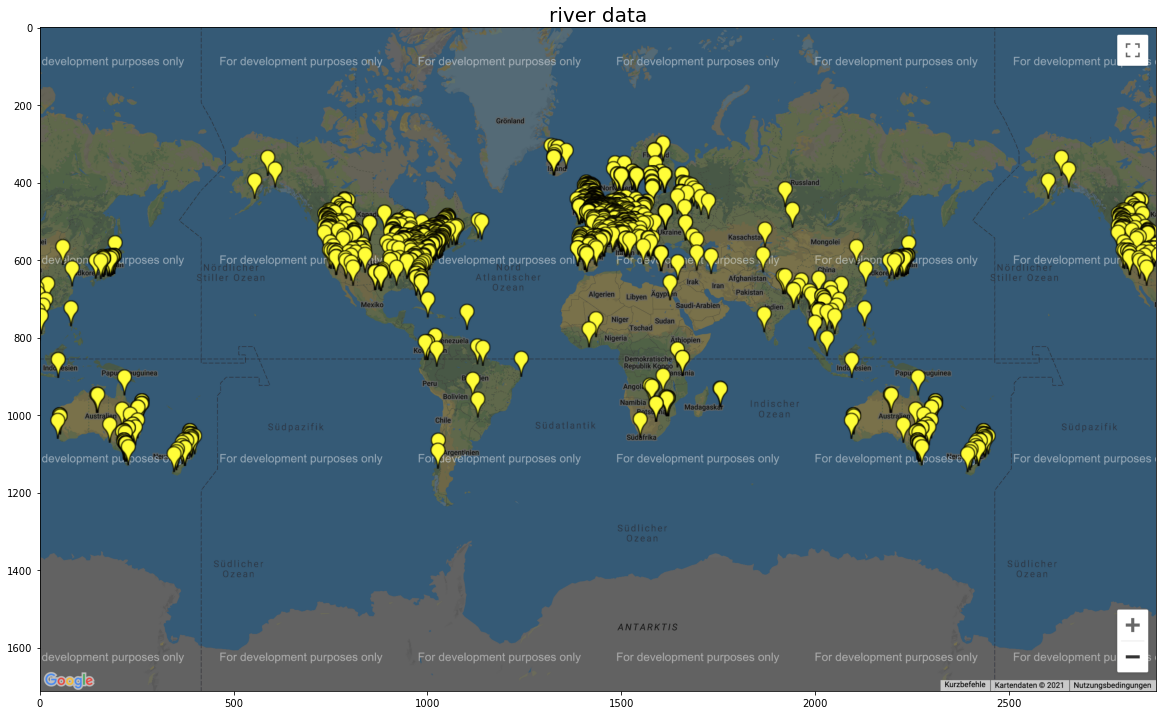

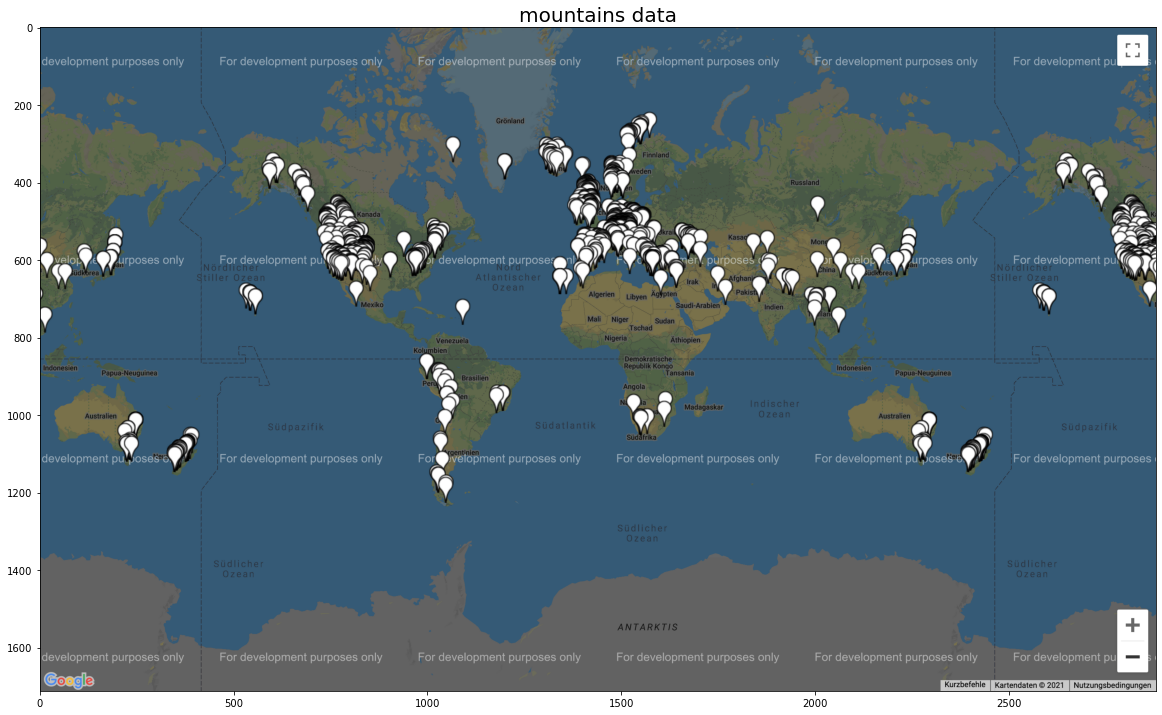

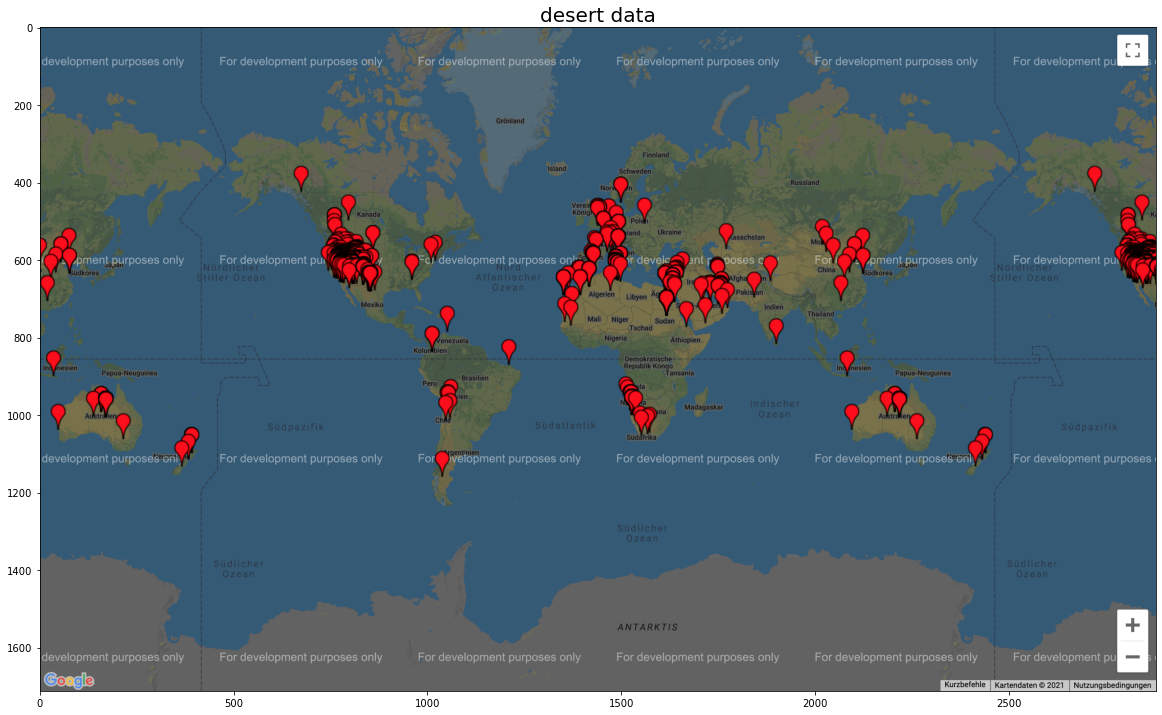

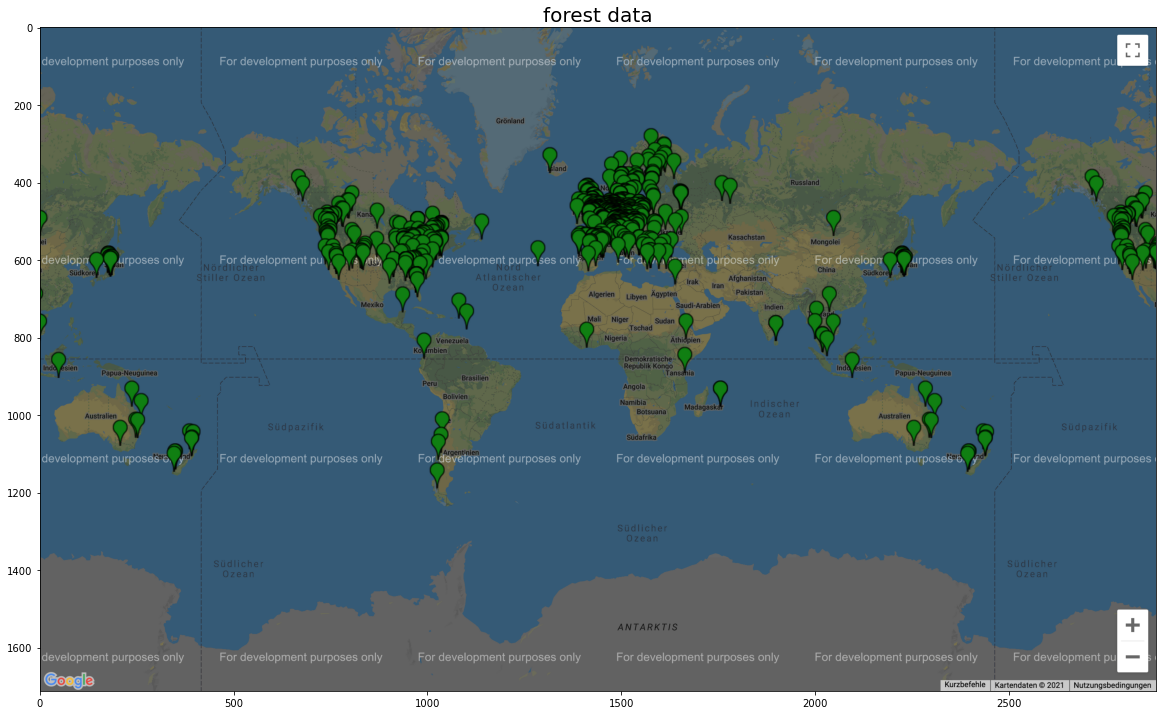

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# display the images
img = mpimg.imread('all.png')
plt.figure(figsize=(20, 20))
imgplot = plt.imshow(img)
plt.title('All Data', fontsize=20)
plt.show()

for word in keywords:
    img = mpimg.imread(f'{word}.png')
    plt.figure(figsize=(20, 20))
    imgplot = plt.imshow(img)
    plt.title(f'{word} data', fontsize=20)
    plt.show()


